In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [19]:
df=pd.read_csv('/content/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
3,1521,3,75.00
6,2732,4,135.00
0,1056,2,39.07
16,1180,3,48.00
18,2770,3,102.00


# Scaling Data

In [20]:
from sklearn.preprocessing import MinMaxScaler 
sx=MinMaxScaler()
sy=MinMaxScaler()
scaled_x=sx.fit_transform(df.drop('price',axis='columns').values)
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [21]:
df.shape

(20, 3)

In [22]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [23]:
w=np.ones(shape=(2))
w

array([1., 1.])

# Creating Batch Gradient Descent function

In [24]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):

    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        y_predicted = np.dot(w,scaled_x.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
        

In [25]:
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

# Graph of Cost/MSE vs Epoch

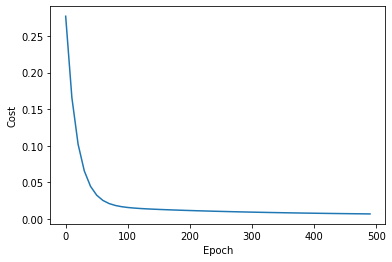

In [26]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list,cost_list)

In [27]:
sx.transform([[2500,4]])[0]

array([0.5862069, 0.75     ])

In [28]:
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_x[0] + w[1]*scaled_x[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

# Predicting Values

In [29]:
predict(2600,4,w,b)

128.45484403267596

# Creating Stochastic Gradient Descent function

In [30]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):

    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]

        y_predicted = np.dot(w,sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

In [31]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71012396, 0.67625397]), -0.23020532584175266, 0.19995206379510105)

In [32]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

# Graph of Cost/MSE vs Epoch

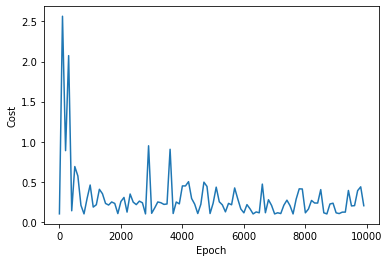

In [33]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

# Predicting values

In [34]:
predict(2600,4,w_sgd,b_sgd)

128.89648594478672